In [64]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Republic vs Democratic USA politican parties Tweets

### Importing the needed modues or libraries

### Read the Data

In [5]:
data = pd.read_csv('./data/ExtractedTweets.csv')
data.shape

(86460, 3)

### Show the first 10 instances

In [6]:
data.head(10)

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
5,Democrat,RepDarrenSoto,RT @EmgageActionFL: Thank you to all who came ...
6,Democrat,RepDarrenSoto,Hurricane Maria left approx $90 billion in dam...
7,Democrat,RepDarrenSoto,RT @Tharryry: I am delighted that @RepDarrenSo...
8,Democrat,RepDarrenSoto,RT @HispanicCaucus: Trump's anti-immigrant pol...
9,Democrat,RepDarrenSoto,RT @RepStephMurphy: Great joining @WeAreUnidos...


### Show the first tweet

In [7]:
data.Tweet[0]

'Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L'

## Data Cleaning

In [8]:
stoplist = stopwords.words('english')

stoplist.append("rt")
stoplist.append("u")
stoplist.append("amp")
stoplist.append("w")
stoplist.append("th")

In [9]:
#we created 2 different class as democrat and republican
democrat=data[data.Party=="Democrat"]
republican=data[data.Party=="Republican"]

### Cleaning democrat party tweets 

In [10]:
democrat_list=[]
for d in democrat.Tweet:
    d=re.sub(r'http\S+', '', d)
    d=re.sub("[^a-zA-Z]", " ", d)
    d=d.lower()
    d=nltk.word_tokenize(d)
    d=[word for word in d if not word in set(stoplist)]
    lemma=nlp.WordNetLemmatizer() 
    d=[lemma.lemmatize(word) for word in d]
    d=" ".join(d)
    democrat_list.append(d)

### Cleaning republican party tweets 

In [11]:
republican_list=[]
for r in republican.Tweet:
    r=re.sub(r'http\S+', '', r)
    r=re.sub("[^a-zA-Z]", " ", r)
    r=r.lower()
    r=nltk.word_tokenize(r)
    r=[word for word in r if not word in set(stoplist)]
    lemma=nlp.WordNetLemmatizer()
    r=[lemma.lemmatize(word) for word in r]
    r=" ".join(r)
    republican_list.append(r)

In [12]:
democrat_tweets=str(democrat_list).split()
republican_tweets=str(republican_list).split()
democrat_tweets=[word.replace("'","") for word in democrat_tweets ]
democrat_tweets=[word.replace("[", "") for word in democrat_tweets ]
democrat_tweets=[word.replace("]","") for word in democrat_tweets ]
democrat_tweets=[word.replace(",", "") for word in democrat_tweets ]

republican_tweets=[word.replace("'","") for word in republican_tweets ]
republican_tweets=[word.replace("[", "") for word in republican_tweets ]
republican_tweets=[word.replace("]","") for word in republican_tweets ]
republican_tweets=[word.replace(",", "") for word in republican_tweets ]

## Frequency of words

In [72]:
from nltk.probability import FreqDist
fdist_democrat = FreqDist(democrat_tweets)
fdist_republican=FreqDist(republican_tweets)
freqdist = FreqDist(democrat_tweets+republican_tweets)

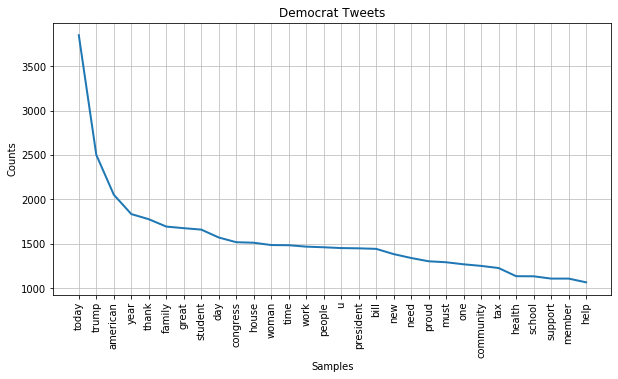

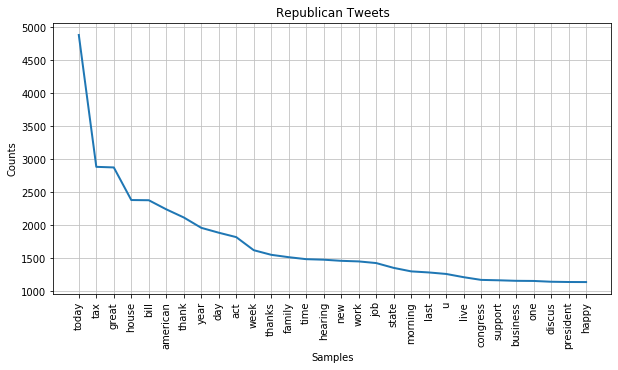

In [14]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
fdist_democrat.plot(30,title="Democrat Tweets")
plt.subplots(figsize=(10,5))
fdist_republican.plot(30,title="Republican Tweets")

### WordCloud of the first 100 words

In [66]:
dem=pd.DataFrame(list(fdist_democrat.items()), columns = ["Word","FrequencyDemocrat"])
rep=pd.DataFrame(list(fdist_republican.items()), columns = ["Word","FrequencyRepublican"])
new=pd.merge(dem,rep,on='Word')
new.head(10)

,Word,FrequencyDemocrat,FrequencyRepublican
0,today,3850,4883
1,senate,368,533
2,dems,136,61
3,vote,741,722
4,proud,1303,923
5,support,1108,1166
6,similar,34,15
7,netneutrality,287,4
8,legislation,492,689
9,house,1512,2382


In [67]:
top100Democrat = dem.sort_values(by=['FrequencyDemocrat'],ascending=False)[0:100]
top100Democrat.head(10)

,Word,FrequencyDemocrat
0,today,3850
80,trump,2502
89,american,2053
108,year,1835
56,thank,1777
197,family,1694
92,great,1676
195,student,1660
465,day,1571
31,congress,1518


In [68]:
top100Republican = rep.sort_values(by=['FrequencyRepublican'],ascending=False)[0:100]
top100Republican.head(10)

,Word,FrequencyRepublican
1,today,4883
102,tax,2885
99,great,2876
188,house,2382
3,bill,2379
71,american,2241
50,thank,2118
135,year,1961
100,day,1887
385,act,1820


In [69]:
unique_string_democratic = (" ").join(top100Democrat['Word'])
unique_string_republican = (" ").join(top100Republican['Word'])
# Wordclouds are created. Collocations is set to false to avoid multiple instances of the same word.
# Colours are set to represent the parties.
dem_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Blues, width=800, height=800).generate(unique_string_democratic)
rep_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Reds, width=800, height=800).generate(unique_string_republican)

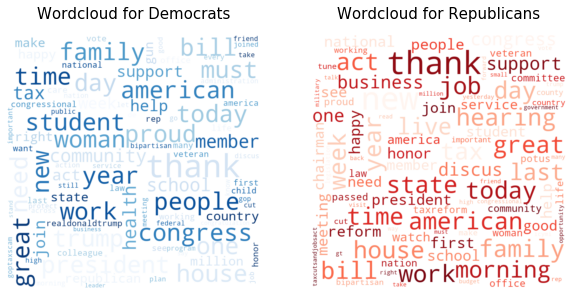

In [70]:
# Plotting of the wordclouds
fig = plt.figure(figsize=(10, 8))

# Democratic wordcloud
plt.subplot(1, 2, 1)
plt.imshow(dem_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Democrats', fontsize=15, y=1.04)

# Republican wordcloud
plt.subplot(1, 2, 2)
plt.imshow(rep_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Republicans', fontsize=15, y=1.04)

plt.savefig("./img/WordCloud100"+".pdf", bbox_inches='tight')
plt.show()

CONCLUSION: We see that both parties' most used words are fairly common words in the field of politics. We therefore calculate the TFIDF for each party.

### WordCloud of the 201-300 words

In [85]:
top300Democrat = dem.sort_values(by=['FrequencyDemocrat'],ascending=False)[201:300]
top300Democrat.head(10)

,Word,FrequencyDemocrat
1117,change,332
1037,r,332
1520,hard,331
1866,free,331
2687,best,330
300,next,330
1330,put,330
1254,middle,330
3800,never,330
694,learn,329


In [86]:
top300Republican = rep.sort_values(by=['FrequencyRepublican'],ascending=False)[201:300]
top300Republican.head(10)

,Word,FrequencyRepublican
859,award,349
499,coming,349
1049,art,348
2879,dc,348
413,call,347
549,better,345
1691,texas,345
74,bonus,343
670,action,340
1700,step,339


In [87]:
unique_string_democratic = (" ").join(top300Democrat['Word'])
unique_string_republican = (" ").join(top300Republican['Word'])
# Wordclouds are created. Collocations is set to false to avoid multiple instances of the same word.
# Colours are set to represent the parties.
dem_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Blues, width=800, height=800).generate(unique_string_democratic)
rep_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Reds, width=800, height=800).generate(unique_string_republican)

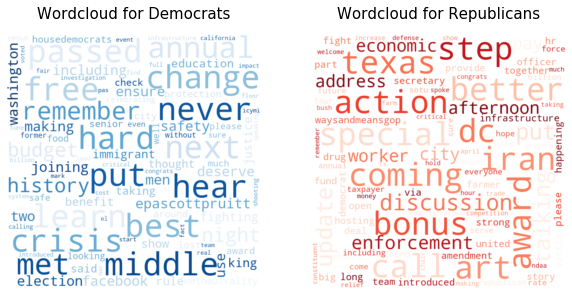

In [88]:
# Plotting of the wordclouds
fig = plt.figure(figsize=(10, 8))

# Democratic wordcloud
plt.subplot(1, 2, 1)
plt.imshow(dem_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Democrats', fontsize=15, y=1.04)

# Republican wordcloud
plt.subplot(1, 2, 2)
plt.imshow(rep_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Republicans', fontsize=15, y=1.04)

plt.savefig("./img/WordCloud300"+".pdf", bbox_inches='tight')
plt.show()

CONCLUSION:

## TFIDF

In [93]:
# The IDF calculations can take 1 of 2 values: either a word is in both documents in which case idf = log(2/2) = 0, or
# The word is in only one document so that idf = log(2/1) = log(2)

# IDF value is pre-calculated for easy retrieval
c = np.log(2)
# Dataframes are created for both parties containg their respective vocabularies
df_dem = pd.DataFrame(set(democrat_tweets), columns=['word'])
df_rep = pd.DataFrame(set(republican_tweets), columns=['word'])
df_dem = dem['Word']
df_rep = rep['Word']
# The dataframes are concatenated using 'outer'. The resulting word-column will be the total
# vocaulary. The second column will be called either 'both' (if word is in both vocabs), 'left_only'
# (word is only in Rep. vocab) or 'right_only' (word is only in Dem. vocab)
df_IDF = pd.merge(df_rep, df_dem, how='outer', indicator=True)
# Column labels
df_IDF.columns = ['word', 'party']
# Column called IDF is created which is a copy of the merger (i.e., 'both', 'left_only', 'right_only')
df_IDF['IDF'] = df_IDF['party']
# It is checked whether the value is 'both'. This returns a boolean (False = 0, True = 1).
# By multiplying these booleans with the calculated IDF, c, all instances where the word is only in
# one party vocab, the value will be c. Where it is 'both', the value will be 0.
df_IDF['IDF'] = (df_IDF['IDF'] != 'both')*c
# Index is changed
df_IDF.set_index('word', inplace=True)
# Frequency distribution of the words
df_freq = pd.DataFrame({'freq': dict(freqdist)})
# Dataframe is created containing the IDF and frequency distribution
df_TFIDF = df_IDF.join(df_freq)
# Values are multiplied resulting in the TFIDF
df_TFIDF['TFIDF'] = df_TFIDF['IDF']*df_TFIDF['freq']

In [94]:
# An empty string is created. A word is added as many times as its TFIDF-value (rounded to nearest integer)
# This is done for both parties
dem_t = ''.join([(index+' ')*int(row['TFIDF']) for index,
                 row in df_TFIDF[df_TFIDF['party'] == 'right_only'].iterrows()])
rep_t = ''.join([(index+' ')*int(row['TFIDF']) for index,
                 row in df_TFIDF[df_TFIDF['party'] == 'left_only'].iterrows()])

In [95]:
# Wordclouds are created. Collocations is set to false to avoid multiple instances of the same word.
# Colours are set to represent the parties.
dem_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Blues, width=800, height=800).generate(dem_t)
rep_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Reds, width=800, height=800).generate(rep_t)

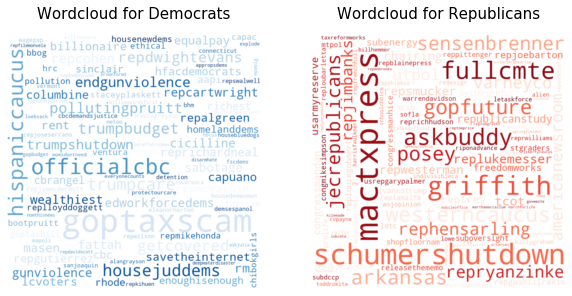

In [96]:
# Plotting of the wordclouds
fig = plt.figure(figsize=(10, 8))

# Democratic wordcloud
plt.subplot(1, 2, 1)
plt.imshow(dem_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Democrats', fontsize=15, y=1.04)

# Republican wordcloud
plt.subplot(1, 2, 2)
plt.imshow(rep_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Republicans', fontsize=15, y=1.04)

plt.savefig("./img/WordCloudTFIDF"+".pdf", bbox_inches='tight')
plt.show()

CONCLUSION:

## Tweet Predictor

### WordCloud of the 100-200 words